<a href="https://colab.research.google.com/github/eduardomatoss/fiap-cybersecurity/blob/main/global-solution/v1_gs_cybersecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd


In [21]:
df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [22]:
df

# Dummies com Type
# Drop Na
# Transform type nameOrig e nameDest / Ou Drop

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5543645,382,PAYMENT,17122.35,C267449413,40452.0,23329.65,M1081244221,0.00,0.00,0.0,0.0
5543646,382,PAYMENT,3120.67,C1085889835,103422.0,100301.33,M1471784776,0.00,0.00,0.0,0.0
5543647,382,CASH_OUT,119423.97,C1608721190,424.0,0.00,C653559165,3107163.97,3226587.93,0.0,0.0
5543648,382,CASH_OUT,318564.58,C210966901,18862.0,0.00,C1645434528,1016980.54,1335545.11,0.0,0.0


In [23]:
df.shape

(5543650, 11)

In [24]:
df[df.isna().any(axis=1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5543649,382,PAYMENT,20130.31,C113860041,0.0,0.0,M483404,NaN,NaN,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543650 entries, 0 to 5543649
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 465.2+ MB


In [26]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.543650e+06,5.543650e+06,5.543650e+06,5.543650e+06,5.543649e+06,5.543649e+06,5.543649e+06,5.543649e+06
mean,2.088778e+02,1.808671e+05,8.415697e+05,8.634817e+05,1.085261e+06,1.213618e+06,7.657411e-04,5.411598e-07
std,1.118458e+02,6.271303e+05,2.920059e+06,2.956930e+06,3.275284e+06,3.588800e+06,2.766143e-02,7.356355e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.380000e+02,1.331569e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.130000e+02,7.527751e+04,1.388753e+04,0.000000e+00,1.357603e+05,2.183396e+05,0.000000e+00,0.000000e+00
75%,3.030000e+02,2.092086e+05,1.073340e+05,1.447400e+05,9.462880e+05,1.117856e+06,0.000000e+00,0.000000e+00
max,3.820000e+02,9.244552e+07,4.381886e+07,4.368662e+07,3.555534e+08,3.560159e+08,1.000000e+00,1.000000e+00


In [27]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.dropna(inplace=True)

In [30]:
df.drop(columns=["nameOrig", "nameDest"], inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5543649 entries, 0 to 5543648
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         float64
 8   isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 422.9+ MB


In [32]:
df.shape

(5543649, 9)

In [33]:
df_set_dummies = pd.get_dummies(df["type"])
df_set_dummies.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [34]:
df_without_type = df.drop(columns=["type"])
df_without_type.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0


In [35]:
df_final = pd.concat([df_without_type, df_set_dummies], axis=1)
df_final.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,0,0,0,1,0


In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5543649 entries, 0 to 5543648
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         float64
 7   isFlaggedFraud  float64
 8   CASH_IN         uint8  
 9   CASH_OUT        uint8  
 10  DEBIT           uint8  
 11  PAYMENT         uint8  
 12  TRANSFER        uint8  
dtypes: float64(7), int64(1), uint8(5)
memory usage: 407.1 MB


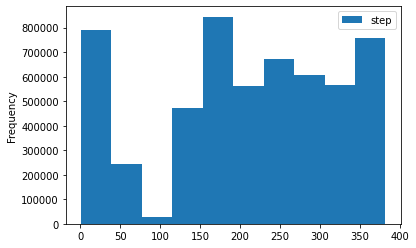

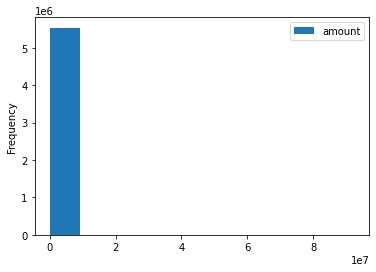

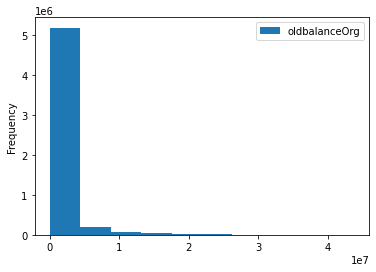

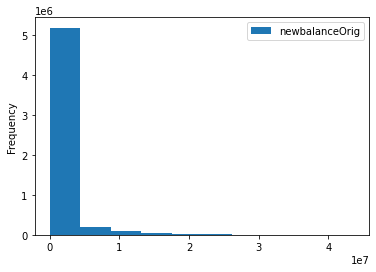

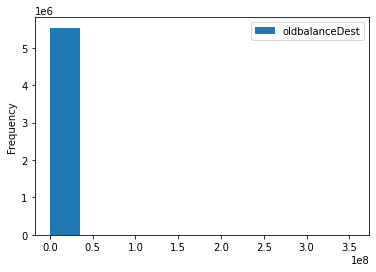

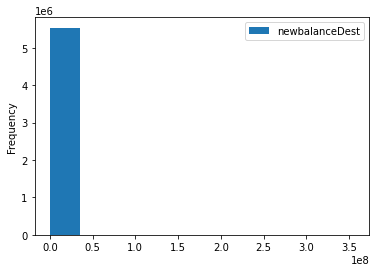

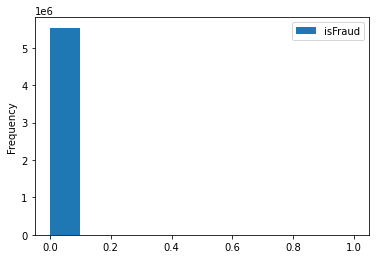

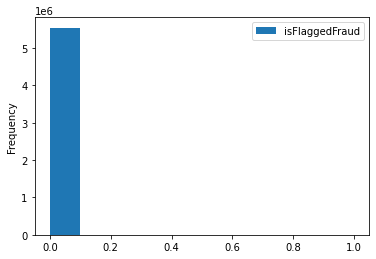

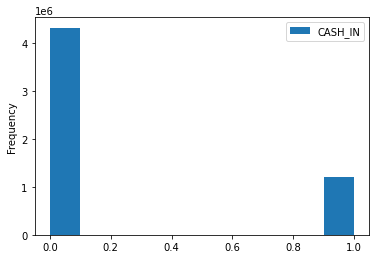

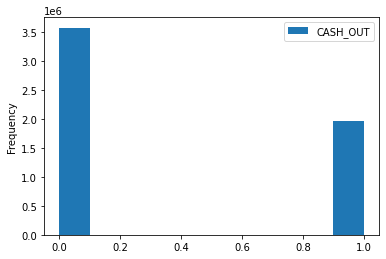

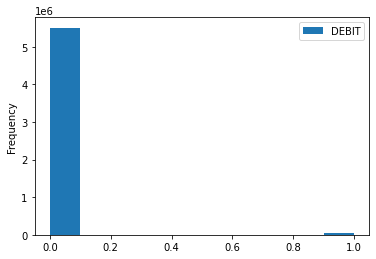

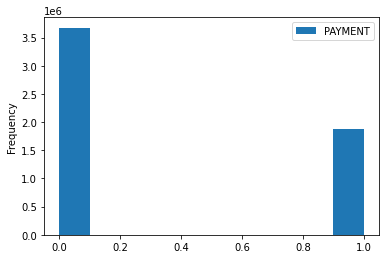

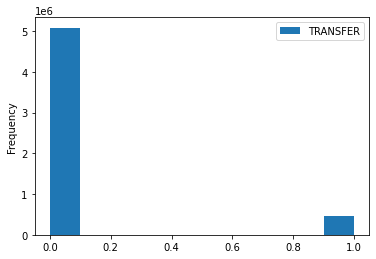

In [37]:
import matplotlib.pyplot as plt

for i in df_final.columns:
  df_final[i].plot.hist(legend=True)
  plt.show()

In [38]:
from sklearn.model_selection import train_test_split

X = df_final.drop(columns=["isFlaggedFraud"])
y = df_final["isFlaggedFraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [39]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax = minmax.transform(X_test)

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

def mlp_classifier(X_train, y_train, X_test, y_test):

  mlp = MLPClassifier(hidden_layer_sizes=(5,),
                    random_state=1,                    
                    activation="logistic",
                    solver="lbfgs")

  mlp.fit(X_train, y_train)

  y_pred = mlp.predict(X_test)

  plot_confusion_matrix(mlp, X_test, y_test, cmap="Blues")

  return print(classification_report(y_test, y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1108730

    accuracy                           1.00   1108730
   macro avg       1.00      1.00      1.00   1108730
weighted avg       1.00      1.00      1.00   1108730



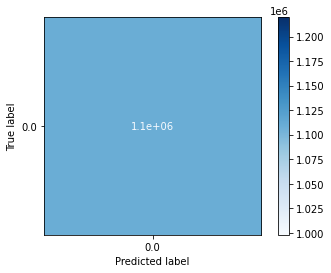

In [41]:
mlp_classifier(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1108730

    accuracy                           1.00   1108730
   macro avg       1.00      1.00      1.00   1108730
weighted avg       1.00      1.00      1.00   1108730



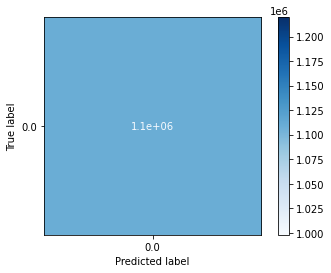

In [42]:
mlp_classifier(X_train_minmax, y_train, X_test_minmax, y_test)

In [43]:
from xgboost import XGBClassifier

def xgb_classifier(X_train, y_train, X_test, y_test):

  xgb = XGBClassifier(n_estimators=10,
                        max_depth=50,
                        booster='gbtree',
                        learning_rate=0.01,
                        verbosity=0,
                        silent=True)
  xgb.fit(X_train, y_train, eval_set=[(X_train, y_train)])

  y_pred = xgb.predict(X_test)

  plot_confusion_matrix(xgb, X_test, y_test, cmap="Blues")

  return print(classification_report(y_test, y_pred))

[0]	validation_0-error:1e-06
[1]	validation_0-error:1e-06
[2]	validation_0-error:1e-06
[3]	validation_0-error:1e-06
[4]	validation_0-error:1e-06
[5]	validation_0-error:1e-06
[6]	validation_0-error:1e-06
[7]	validation_0-error:1e-06
[8]	validation_0-error:1e-06
[9]	validation_0-error:1e-06


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1108730

    accuracy                           1.00   1108730
   macro avg       1.00      1.00      1.00   1108730
weighted avg       1.00      1.00      1.00   1108730



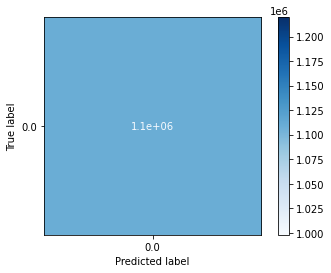

In [44]:
xgb_classifier(X_train, y_train, X_test, y_test)

[0]	validation_0-error:1e-06
[1]	validation_0-error:1e-06
[2]	validation_0-error:1e-06
[3]	validation_0-error:1e-06
[4]	validation_0-error:1e-06
[5]	validation_0-error:1e-06
[6]	validation_0-error:1e-06
[7]	validation_0-error:1e-06
[8]	validation_0-error:1e-06
[9]	validation_0-error:1e-06


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1108730

    accuracy                           1.00   1108730
   macro avg       1.00      1.00      1.00   1108730
weighted avg       1.00      1.00      1.00   1108730



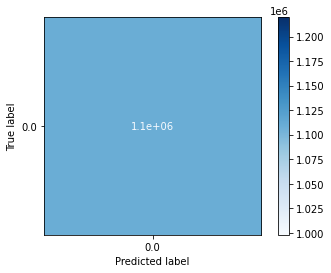

In [45]:
xgb_classifier(X_train_minmax, y_train, X_test_minmax, y_test)